In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.image as mpimg
from subprocess import Popen
import glob,os,time,sys,math,shutil
import numpy as np
import re
import pandas as pd
from IPython.display import display,clear_output
from matplotlib.ticker import FormatStrFormatter
from pylab import rcParams
import seaborn as sns
import matplotlib as mpl
from scipy.stats import gaussian_kde,kde,ks_2samp,entropy
timestr=time.strftime("%m%d")
from matplotlib import colormaps
import warnings
warnings.filterwarnings('ignore')

In [2]:
def calculate_kl_divergence(df_simulation,df_experiment,salt_conc):
    salt_def='# dimers_'+salt_conc
    count_def='counts_'+salt_conc
    bin_centers_std=df_experiment[salt_def]
    relative_counts_std=df_experiment[count_def]/np.sum(df_experiment[count_def])
    #df_simulation_filtered=df_simulation[df_simulation['NE']>50]
    df_simulation_filtered=df_simulation
    kde = gaussian_kde(df_simulation_filtered['NE'])
    q_dist = kde(bin_centers_std)  # Evaluate KDE at bin centers
    q_dist /= np.sum(q_dist)
    a = np.asarray(relative_counts_std, dtype=float)
    b = np.asarray(q_dist, dtype=float)

    return np.sum(np.where(a != 0, a * np.log(a / b), 0)) ,q_dist


In [22]:
df_experiment=pd.read_csv('../fig04a_hbv_assembly_w-haptamra - Sheet1.csv',skiprows=5)
df_experiment=df_experiment.dropna()
salt_def='# dimers_'+'lowsalt'
count_def='counts_'+'lowsalt'
bin_centers_std=df_experiment[salt_def]
relative_counts_std=df_experiment[count_def]/np.sum(df_experiment[count_def])

In [25]:
home_dire='/home/smriti/BigStorage/figs_movies_KMC/new_runs_2025/stdsalt_drug_parasweep/allEnergyFiles'
conc1_file=home_dire+'/SM_high-DMU--5.5_MUGB--5.8_GDRUG--3.dat'
conc2_file=home_dire+'/SM_high-DMU--5.5_MUGB--5.8_GDRUG-0.dat'
conc3_file=home_dire+'/SM_high-DMU--5.5_MUGB--5.8_GDRUG--1.dat'
df1=pd.read_csv(conc1_file)
df2=pd.read_csv(conc2_file)
df3=pd.read_csv(conc3_file)
kl_score1,dist1=calculate_kl_divergence(df1,df_experiment,'lowsalt')
kl_score2,dist2=calculate_kl_divergence(df2,df_experiment,'lowsalt')
kl_score3,dist3=calculate_kl_divergence(df3,df_experiment,'lowsalt')


Text(0.5, 1.0, 'Comparison of drug concn @ low salt')

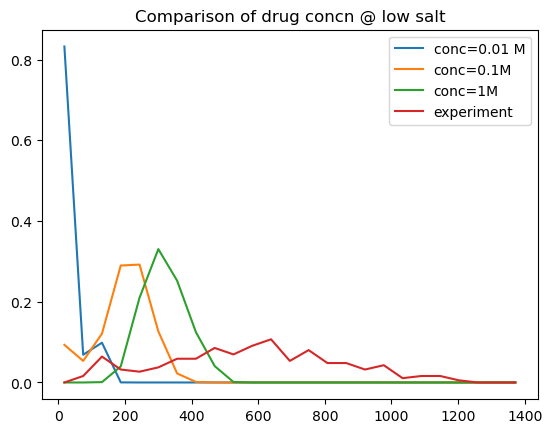

In [26]:
plt.plot(bin_centers_std,dist1,label=f'conc=0.01 M')
plt.plot(bin_centers_std,dist3,label='conc=0.1M')
plt.plot(bin_centers_std,dist2,label=f'conc=1M')
plt.plot(bin_centers_std,relative_counts_std,label='experiment')
plt.legend()
plt.title('Comparison of drug concn @ low salt')

In [9]:
def create_histogram_sim(bin_def,file_path):
    #bin2=[100+50*x for x in range(20)]
    #data=np.loadtxt(outcomefile).T
    data=np.loadtxt(file_path,delimiter=',',skiprows=1).T
    xx=[]
    for each in data[-3]:
     if 3<=each:
       xx.append(each)
    y,binEdges=np.histogram(xx,bins=bin_def)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    return bincenters,y/len(2*xx)


['/home/smriti/BigStorage/figs_movies_KMC/new_runs_2025/drug_conc_atstd/allEnergyFiles/SM_high-DMU--4.5_MUGB--6.0_GDRUG--5.dat', '/home/smriti/BigStorage/figs_movies_KMC/new_runs_2025/drug_conc_atstd/allEnergyFiles/SM_high-DMU--4.5_MUGB--6.0_GDRUG--7.dat', '/home/smriti/BigStorage/figs_movies_KMC/new_runs_2025/drug_conc_atstd/allEnergyFiles/SM_high-DMU--4.5_MUGB--6.0_GDRUG--3.dat', '/home/smriti/BigStorage/figs_movies_KMC/new_runs_2025/drug_conc_atstd/allEnergyFiles/SM_high-DMU--4.5_MUGB--6.0_GDRUG--1.dat', '/home/smriti/BigStorage/figs_movies_KMC/new_runs_2025/drug_conc_atstd/allEnergyFiles/SM_high-DMU--4.5_MUGB--6.0_GDRUG--11.0.dat', '/home/smriti/BigStorage/figs_movies_KMC/new_runs_2025/drug_conc_atstd/allEnergyFiles/SM_high-DMU--4.5_MUGB--6.0_GDRUG--9.dat', '/home/smriti/BigStorage/figs_movies_KMC/new_runs_2025/drug_conc_atstd/allEnergyFiles/SM_high-DMU--4.5_MUGB--6.0_GDRUG-0.dat']


Text(0, 0.5, 'relative frequency')

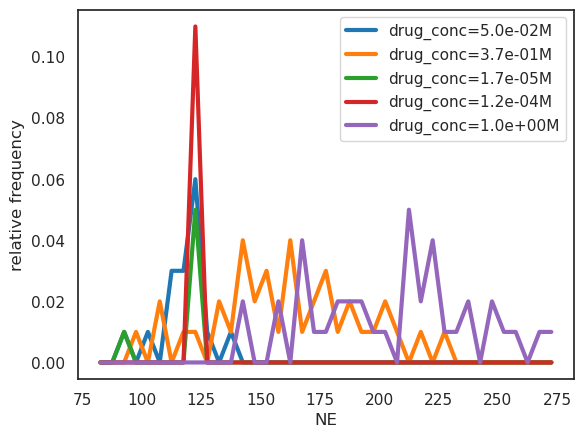

In [31]:
### exp vs simulation into two subplots

file_dire='/home/smriti/BigStorage/figs_movies_KMC/new_runs_2025/drug_conc_atstd/allEnergyFiles/'
drug_conc_files=glob.glob(file_dire+'*.dat')
print((drug_conc_files))
sns.set_theme(style="white", palette=None)
markerarraystd=mpl.colormaps['RdYlBu'](np.linspace(0.1,1,15))
markerarrayhigh=mpl.colormaps['ocean'](np.linspace(0,1.0,3))
markerarraylow=mpl.colormaps['winter'](np.linspace(0.1,1,5))
myarrays = {
    "markerarraystd":markerarraystd,
    "markerarrayhigh":markerarrayhigh,
    "markerarraylow":markerarraylow,
}




bin_list=[80+5*x for x in range(40)]
for file in drug_conc_files[2:]:
    conc_drug=(file.split('.dat')[0]).split('GDRUG-')[1]
    conc_exp=math.exp(float(conc_drug))
    bin_centers_conc,y_conc=create_histogram_sim(bin_list,file)
    plt.plot(bin_centers_conc,y_conc,label='drug_conc={:0.1e}M'.format(conc_exp),linewidth=3)
plt.legend()
plt.xlabel('NE')
plt.ylabel('relative frequency')


In [14]:
name_file=drug_conc_files[0].split('.dat')
print(name_file[0].split('GDRUG-')[1])

-5


In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib.ticker import PercentFormatter
sns.set_theme()
def create_histogram_drug(bin_def,file_path):
    #bin2=[100+50*x for x in range(20)]
    #data=np.loadtxt(outcomefile).T
    data=np.loadtxt(file_path,delimiter=' ').T
    print(data.shape)
    xx=[]
    for each in data[-1]:
     if 0<each:
       xx.append(each)
    y,binEdges=np.histogram(xx,bins=bin_def)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    return bincenters,y/len(2*xx)
files_low_salt_drug='../new_runs_2025/nd_calc/lowsalt_nd.dat'
files_high_salt_drug='../new_runs_2025/nd_calc/highsalt_nd.dat'
files_std_salt_drug='../new_runs_2025/nd_calc/stdsalt_nd.dat'
bin_def_low=np.linspace(0,400,40)
bin_def_high=np.linspace(0,250,40)
bin_def_std=np.linspace(0,300,40)
bin_centers_low,y_low=create_histogram_drug(bin_def_low,files_low_salt_drug)
bin_centers_high,y_high=create_histogram_drug(bin_def_high,files_high_salt_drug)
bin_centers_std,y_std=create_histogram_drug(bin_def_std,files_std_salt_drug)
plt.plot(bin_centers_low,y_low,linewidth=4,color='b',label=fr'low salt')
plt.plot(bin_centers_high,y_high,linewidth=4,color='g',label=fr'high salt')
plt.plot(bin_centers_std,y_std,linewidth=4,color='r',label=fr'std salt')
plt.legend()
plt.show()



df_low_salt_drug=pd.read_csv(files_low_salt_drug,delim_whitespace=True,header=None)
df_low_salt_drug.columns=['SWEEP','NE','ND']
df_high_salt_drug=pd.read_csv(files_high_salt_drug,delim_whitespace=True,header=None)
df_high_salt_drug.columns=['SWEEP','NE','ND']
df_std_salt_drug=pd.read_csv(files_std_salt_drug,delim_whitespace=True,header=None)
df_std_salt_drug.columns=['SWEEP','NE','ND']
for i in range(len(df_low_salt_drug)):
  df_low_salt_drug['salt']='low'
for i in range(len(df_high_salt_drug)):
  df_high_salt_drug['salt']='high'
for i in range(len(df_std_salt_drug)):
  df_std_salt_drug['salt']='std'
df_all_salt=pd.concat([df_low_salt_drug,df_high_salt_drug,df_std_salt_drug])
axs=sns.displot(data=df_all_salt,x='ND',hue='salt',kde=True)
plt.show()
sns.jointplot(
    data=df_all_salt,
    x="NE", y="ND", hue="salt",
    kind="kde",linewidth=4
)







